In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Main_Dataset.csv to Main_Dataset (1).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import accuracy_score


# gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
# tf.config.experimental.set_memory_growth(device=gpus[0], enable=True)

# gpu_devices = tf.config.experimental.list_physical_devices("GPU")
# for device in gpu_devices:
#     tf.config.experimental.set_memory_growth(device, True)


In [ ]:
import pandas as pd
import io

mtea_df = pd.read_csv(io.BytesIO(uploaded['Main_Dataset.csv']))
print(mtea_df.head())

   Unnamed: 0                                               Text  Rating
0           0  this chinese bakerybubble tea heaven the baker...       1
1           1  beautiful cakes deserts but favorite bubble te...       1
2           2  had meet corporate client area recommended bub...       0
3           3  decent bakery especially asian bakery town the...       1
4           4  it clean neat place there many kind pastry kin...       1


In [ ]:
mtea_df['Rating'].value_counts()
#86% 1
#13% 0

1    19440
0    18022
Name: Rating, dtype: int64

In [ ]:
# mtea_df = mtea_df.reindex(np.random.permutation(mtea_df.index))

In [ ]:
mtea_df.head(5)

,Unnamed: 0,Text,Rating
0,0,this chinese bakerybubble tea heaven the baker...,1
1,1,beautiful cakes deserts but favorite bubble te...,1
2,2,had meet corporate client area recommended bub...,0
3,3,decent bakery especially asian bakery town the...,1
4,4,it clean neat place there many kind pastry kin...,1


In [ ]:
x=mtea_df['Text'].values
y=mtea_df['Rating'].values

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# kf = StratifiedKFold(n_splits=5)

In [ ]:
# for train_index, test_index in kf.split(x,y):
#   x_train, x_test, y_train, y_test = x[train_index],x[test_index],y[train_index],y[test_index]

In [ ]:
print('sentiment text: ', x_train[2])
print('sentiment: ',y_train[2])

sentiment text:  deliciously amazing best bubble tea valley the decorations drinks make even better my son mesmerized
sentiment:  1


In [ ]:
#tokenizing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab=2000000
tokenizer= Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [ ]:
word_indx=tokenizer.word_index
V=len(word_indx)
print("The size of dataset vocab is: ", V)

The size of dataset vocab is:  25837


In [ ]:
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence: ', train_seq[0])
print('Testing sequence: ', test_seq[0])

Training sequence:  [53, 6, 88, 130, 46, 4, 443, 1297, 78, 262, 48, 23, 187, 393, 183, 42, 20]
Testing sequence:  [198, 97, 68, 1832, 12329, 5, 1, 782, 27, 483, 5, 2885, 123, 662, 31, 10, 61, 2944, 509, 10, 1, 238, 23, 5, 4, 558, 80, 13, 6619, 912, 7005, 462, 652, 200, 257, 373, 1, 1063, 382, 1, 174, 22, 333, 210, 5, 25, 23, 114, 206, 6, 149, 6, 918, 9]


In [ ]:
#padding
pad_train = pad_sequences(train_seq)
T=pad_train.shape[1]
print('The length of training sequences is: ', T)

The length of training sequences is:  547


In [ ]:
pad_test = pad_sequences(test_seq, maxlen=T)
print('The length of testing sequence is: ', pad_test.shape[1])

The length of testing sequence is:  547


In [ ]:
# #testing
# import keras
# from keras.models import load_model

# new_model = keras.models.load_model('/content/may_20/')

In [ ]:
# new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 547)]             0         
                                                                 
 embedding (Embedding)       (None, 547, 20)           558300    
                                                                 
 lstm (LSTM)                 (None, 547, 15)           2160      
                                                                 
 dropout (Dropout)           (None, 547, 15)           0         
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                512       
                                                             

In [ ]:
# loss,acc=new_model.evaluate(pad_train,y_train,verbose=2)

937/937 - 36s - loss: 0.1104 - accuracy: 0.9812 - 36s/epoch - 38ms/step


In [ ]:
# #sentiment detecting

# # def predict_sentiment(text):
# #     #preprocessing
# #     text_seq = tokenizer.texts_to_sequences(text)
# #     text_pad = pad_sequences(text_seq, maxlen=T)

# #     #predicting the class
# #     predicted_sentiment = model.predict(text_pad).round()
# #     print(predicted_sentiment)

# #     if predicted_sentiment == 1.0:
# #         return(print('Good Sentiment'))
# #     else:
# #         return(print('Bad Sentiment'))

# #show how close prediction is to 0 0.5 and 1
# def predict_sentiment(text):
#     #preprocessing

#     text_seq = tokenizer.texts_to_sequences(text)
#     text_pad = pad_sequences(text_seq, maxlen=T)

#     #predicting the class
#     predicted_sentiment = new_model.predict(text_pad)
#     #rounded = [np.round(text,2) for x in predicted_sentiment]
#     rounded_predicted_sentiment = np.round(predicted_sentiment,2)


#     if rounded_predicted_sentiment.round() == 1.0:
#         print(predicted_sentiment)
#         return(print('Good Sentiment'))

#     else:
#         print(predicted_sentiment)
#         return(print('Bad Sentiment'))




# #text = ["Boba Tea has a great selection of teas and boba. The fruit teas aren't a sweet compared to other boba tea places I've been to which I appreciate. The staff is approachable and the space is clean.We'll most likely come back!"]
# #text=["This doesn't look freshly made. Really disappointed! All the tapioca was stuck together, impossible to drink with a straw. Drink didn't taste fresh."]
# text=["If this was my first bubble milk tea, I would not buy or crave for more. If you want to pay £8 for two water milk tea, please try it here. Real low & cheap quality. Never again!!!!!"]
# #text=["No line at 3:30 on a Friday afternoon. We got the Thai tea and honey roasted milk teas. Both were delicious. The staff was very nice. There is a little parking lot, so parking was easy. I look forward to returning and trying their other teas and hot food items!"]
# #text=["This place is pretty terrible, I don't know if you can call it a bubble tea store when it serves things that taste like water"]
# predict_sentiment(text)


[[0.26457134]]
Bad Sentiment


In [ ]:
#model

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

D=20 #dimension layer
M=15 #lstm layer

i = Input (shape=(T,))
x = Embedding(V+1, D)(i)
x = LSTM(M, return_sequences=True,
         kernel_regularizer=regularizers.L2(1e-8),
         bias_regularizer=regularizers.L2(1e-8),
         activity_regularizer=regularizers.L2(1e-8))(x)
x = Dropout(0.7)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(8, activation='relu',
         kernel_regularizer=regularizers.L2(1e-8),
         bias_regularizer=regularizers.L2(1e-8),
         activity_regularizer=regularizers.L2(1e-8))(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 547)]             0         
                                                                 
 embedding (Embedding)       (None, 547, 20)           516760    
                                                                 
 lstm (LSTM)                 (None, 547, 15)           2160      
                                                                 
 dropout (Dropout)           (None, 547, 15)           0         
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 8)                 128       
                                                             

In [ ]:
#train
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

filepath = '/content/ModelCheckpoints2/Checkpoint.ckpt'
checkpoint =  ModelCheckpoint(filepath,monitor='val_loss',verbose=1,mode='min',save_weights_only=True)
monitor = EarlyStopping(monitor='val_loss', min_delta=0.0001,patience=3,verbose=1,mode='auto',restore_best_weights=True)


In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# filepath = '/content/ModelCheckpoints/CheckpointModel_3.h5'

# keras_callbacks   = [
#       EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
#       ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')
# ]

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# monitor = EarlyStopping(monitor='val_loss', min_delta=0.0005,patience=5,verbose=1,mode='auto',restore_best_weights=True)

In [ ]:

# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=[tf.keras.metrics.AUC()])

learning=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=learning,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
pwd

'/content'

In [ ]:
# import keras

# class CustomSaver(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if epoch == 82:  # or save after some epoch, each k-th epoch etc.
#             self.model.save("model_{}.hd5".format(epoch))

# saver = CustomSaver()

In [ ]:
r=model.fit(pad_train,y_train,validation_data=(pad_test,y_test), callbacks=[monitor,checkpoint],epochs=20)
#r=model.fit(pad_train,y_train,validation_data=(pad_test,y_test),epochs=50)

Epoch 1/20
820/820 [==============================] - ETA: 0s - loss: 0.5856 - accuracy: 0.7058
Epoch 1: saving model to /content/ModelCheckpoints2/Checkpoint.ckpt
820/820 [==============================] - 29s 32ms/step - loss: 0.5856 - accuracy: 0.7058 - val_loss: 0.5424 - val_accuracy: 0.8992
Epoch 2/20
817/820 [============================>.] - ETA: 0s - loss: 0.3773 - accuracy: 0.8802
Epoch 2: saving model to /content/ModelCheckpoints2/Checkpoint.ckpt
820/820 [==============================] - 19s 24ms/step - loss: 0.3772 - accuracy: 0.8802 - val_loss: 0.4428 - val_accuracy: 0.9239
Epoch 3/20
820/820 [==============================] - ETA: 0s - loss: 0.2954 - accuracy: 0.9073
Epoch 3: saving model to /content/ModelCheckpoints2/Checkpoint.ckpt
820/820 [==============================] - 17s 21ms/step - loss: 0.2954 - accuracy: 0.9073 - val_loss: 0.4015 - val_accuracy: 0.9330
Epoch 4/20
819/820 [============================>.] - ETA: 0s - loss: 0.2576 - accuracy: 0.9240
Epoch 4: savi

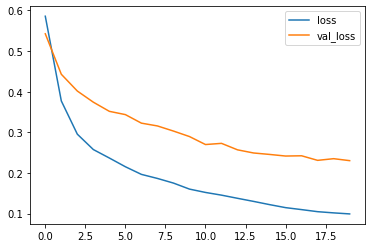

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
#method 1

model.save('20 epochs.h5')

In [ ]:
#save weights option 1
model.save_weights('/content/saved model2/', save_format='h5')

OSError: ignored

In [ ]:
#serialization option 2
model.save('20epochs/')

INFO:tensorflow:Assets written to: 20epochs/assets


INFO:tensorflow:Assets written to: 20epochs/assets


In [ ]:
!zip -r /content/20epochs.zip /content/20epochs

  adding: content/20epochs/ (stored 0%)
  adding: content/20epochs/saved_model.pb (deflated 90%)
  adding: content/20epochs/assets/ (stored 0%)
  adding: content/20epochs/variables/ (stored 0%)
  adding: content/20epochs/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/20epochs/variables/variables.index (deflated 62%)
  adding: content/20epochs/keras_metadata.pb (deflated 89%)


In [ ]:
!zip -r /content/checkpoint20epochs.zip /content/ModelCheckpoints2

  adding: content/ModelCheckpoints2/ (stored 0%)
  adding: content/ModelCheckpoints2/Checkpoint.ckpt.index (deflated 63%)
  adding: content/ModelCheckpoints2/Checkpoint.ckpt.data-00000-of-00001 (deflated 7%)
  adding: content/ModelCheckpoints2/checkpoint (deflated 48%)


In [ ]:
#option 3
import pickle

with open('model_pickle_','wb') as f:
  pickle.dump(model,f)

INFO:tensorflow:Assets written to: ram://d95eb43b-5f11-445b-8dd6-fefdcd7e813e/assets


INFO:tensorflow:Assets written to: ram://d95eb43b-5f11-445b-8dd6-fefdcd7e813e/assets


In [ ]:
p_pred = model.predict(pad_test)
p_pred = p_pred.flatten()

In [ ]:
print(p_pred.round(2))

[0.39 0.93 0.91 ... 0.1  0.13 0.88]


In [ ]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[0 1 1 ... 0 0 1]


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5115  270]
 [ 551 5303]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      5385
           1       0.95      0.91      0.93      5854

    accuracy                           0.93     11239
   macro avg       0.93      0.93      0.93     11239
weighted avg       0.93      0.93      0.93     11239



In [ ]:
#plotting losses
#plt.plot(r.history['loss'], label='loss')
#plt.plot(r.history['val_loss'], label='val_accuracy')
#plt.legend()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
model.save('sentiment_analysis_100_epochs_reguralization_final_for_Now.h5')

In [ ]:
#syntax for reloading model

from tensorflow.keras.models import load_model

loaded_model=load_model('sentiment_analysis.h5')


In [ ]:
#sentiment detecting

# def predict_sentiment(text):
#     #preprocessing
#     text_seq = tokenizer.texts_to_sequences(text)
#     text_pad = pad_sequences(text_seq, maxlen=T)

#     #predicting the class
#     predicted_sentiment = model.predict(text_pad).round()
#     print(predicted_sentiment)

#     if predicted_sentiment == 1.0:
#         return(print('Good Sentiment'))
#     else:
#         return(print('Bad Sentiment'))

#show how close prediction is to 0 0.5 and 1
def predict_sentiment(text):
    #preprocessing
    text_seq = tokenizer.texts_to_sequences(text)
    text_pad = pad_sequences(text_seq, maxlen=T)

    #predicting the class
    predicted_sentiment = model.predict(text_pad)
    #rounded = [np.round(text,2) for x in predicted_sentiment]
    rounded_predicted_sentiment = np.round(predicted_sentiment,2)


    if rounded_predicted_sentiment.round() == 1.0:
        print(predicted_sentiment)
        return(print('Good Sentiment'))

    else:
        print(predicted_sentiment)
        return(print('Bad Sentiment'))




text = ["Boba Tea has a great selection of teas and boba. The fruit teas aren't a sweet compared to other boba tea places I've been to which I appreciate. The staff is approachable and the space is clean.We'll most likely come back!"]
#text=["This doesn't look freshly made. Really disappointed! All the tapioca was stuck together, impossible to drink with a straw. Drink didn't taste fresh."]
#text=["If this was my first bubble milk tea, I would not buy or crave for more. If you want to pay £8 for two water milk tea, please try it here. Real low & cheap quality. Never again!!!!!"]
#text=["No line at 3:30 on a Friday afternoon. We got the Thai tea and honey roasted milk teas. Both were delicious. The staff was very nice. There is a little parking lot, so parking was easy. I look forward to returning and trying their other teas and hot food items!"]
#text=["This place is pretty terrible, I don't know if you can call it a bubble tea store when it serves things that taste like water"]
predict_sentiment(text)


[[0.97469866]]
Good Sentiment


In [ ]:
# validation_fields=['Text']
# validation_file_path='Validation.csv'
# validation_df=pd.read_csv(validation_file_path,skipinitialspace=True,usecols=validation_fields)
# validation_df.head(1)


# text = ["Boba Tea has a great selection of teas and boba. The fruit teas aren't a sweet compared to other boba tea places I've been to which I appreciate. The staff is approachable and the space is clean.We'll most likely come back!"]
# text=["This doesn't look freshly made. Really disappointed! All the tapioca was stuck together, impossible to drink with a straw. Drink didn't taste fresh."]
# #predict_sentiment(text)

In [ ]:
import keras
from keras.models import load_model

new_model = keras.models.load_model('newepoch/')

In [ ]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 547)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 547, 20)           561940    
                                                                 
 lstm_1 (LSTM)               (None, 547, 15)           2160      
                                                                 
 dropout_1 (Dropout)         (None, 547, 15)           0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 32)                512       
                                                           

In [ ]:
new_model_fit=new_model.fit(pad_train,y_train,validation_data = (pad_test,y_test),callbacks=[monitor],epochs=2)

Epoch 1/2
937/937 [==============================] - 89s 88ms/step - loss: 0.1452 - accuracy: 0.9534 - val_loss: 0.2079 - val_accuracy: 0.9397
Epoch 2/2
937/937 [==============================] - 81s 86ms/step - loss: 0.1427 - accuracy: 0.9542 - val_loss: 0.2048 - val_accuracy: 0.9383


In [ ]:
#sentiment detecting

# def predict_sentiment(text):
#     #preprocessing
#     text_seq = tokenizer.texts_to_sequences(text)
#     text_pad = pad_sequences(text_seq, maxlen=T)

#     #predicting the class
#     predicted_sentiment = model.predict(text_pad).round()
#     print(predicted_sentiment)

#     if predicted_sentiment == 1.0:
#         return(print('Good Sentiment'))
#     else:
#         return(print('Bad Sentiment'))

#show how close prediction is to 0 0.5 and 1
def predict_sentiment(text):
    #preprocessing

    text_seq = tokenizer.texts_to_sequences(text)
    text_pad = pad_sequences(text_seq, maxlen=T)

    #predicting the class
    predicted_sentiment = new_model.predict(text_pad)
    #rounded = [np.round(text,2) for x in predicted_sentiment]
    rounded_predicted_sentiment = np.round(predicted_sentiment,2)


    if rounded_predicted_sentiment.round() == 1.0:
        print(predicted_sentiment)
        return(print('Good Sentiment'))

    else:
        print(predicted_sentiment)
        return(print('Bad Sentiment'))




#text = ["Boba Tea has a great selection of teas and boba. The fruit teas aren't a sweet compared to other boba tea places I've been to which I appreciate. The staff is approachable and the space is clean.We'll most likely come back!"]
#text=["This doesn't look freshly made. Really disappointed! All the tapioca was stuck together, impossible to drink with a straw. Drink didn't taste fresh."]
text=["If this was my first bubble milk tea, I would not buy or crave for more. If you want to pay £8 for two water milk tea, please try it here. Real low & cheap quality. Never again!!!!!"]
#text=["No line at 3:30 on a Friday afternoon. We got the Thai tea and honey roasted milk teas. Both were delicious. The staff was very nice. There is a little parking lot, so parking was easy. I look forward to returning and trying their other teas and hot food items!"]
#text=["This place is pretty terrible, I don't know if you can call it a bubble tea store when it serves things that taste like water"]
predict_sentiment(text)


[[0.2798443]]
Bad Sentiment
